In [1]:
# Install required libraries if not already installed
# !pip install pandas scikit-learn matplotlib seaborn


# **Data Preprocessing for Machine Learning**
---

This notebook uses the **Adult Income Dataset** to demonstrate essential data preprocessing techniques. Proper preprocessing ensures optimal performance of machine learning models.

---

## **Overview**
1. Handling Missing Values
2. Feature Scaling (Normalization, Standardization)
3. Encoding Categorical Variables
4. Feature Engineering and Feature Selection


In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load Adult Income dataset
data = fetch_openml(name='adult', version=2, as_frame=True)
df = data.frame

# Preview the data
print("Dataset Preview:")
df.head()


C:\Users\BRC\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Dataset Preview:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


# Loading and Previewing the Adult Income Dataset

This section demonstrates how to load and preview the **Adult Income Dataset**, a popular dataset used for binary classification tasks. The goal is to predict whether an individual earns more or less than $50,000 annually based on various demographic and employment features.

---

## Dataset Overview:
- The dataset is obtained from the **OpenML** repository using the `fetch_openml` function from `sklearn.datasets`.
- It contains 48,842 samples with 14 attributes, including:
  - **Demographic Features**:
    - Age, Education, Marital Status, Race, Sex, etc.
  - **Employment Features**:
    - Workclass, Occupation, Hours-per-week, etc.
  - **Target Variable**:
    - `<=50K`: Individual earns less than or equal to $50,000 annually.
    - `>50K`: Individual earns more than $50,000 annually.

---

## Steps in the Script:
1. **Load the Dataset**:
   - The dataset is fetched using `fetch_openml` with the name `adult` and version `2`.
   - The `as_frame=True` parameter returns the data as a pandas DataFrame for easier manipulation and exploration.

2. **Preview the Data**:
   - The `head()` function is used to display the first few rows of the dataset, providing a glimpse of its structure.

---

## **1. Handling Missing Values**
---

### **Step 1: Check for Missing Values**

We'll identify and handle missing values in the dataset.


In [3]:
# Replace '?' with NaN for consistency
df.replace('?', pd.NA, inplace=True)

# Check missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])

# Drop rows with missing values
df.dropna(inplace=True)

# Verify that missing values are handled
print("Missing values after cleanup:\n", df.isnull().sum())


Missing values per column:
 workclass         2799
occupation        2809
native-country     857
dtype: int64
Missing values after cleanup:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


# Handling Missing Values in the Adult Income Dataset

This section demonstrates how to handle missing values in the **Adult Income Dataset**. Cleaning the data is an essential step in preparing it for machine learning models.

---

## Steps in the Script:
1. **Replace Missing Indicators with NaN**:
   - In the Adult Income dataset, missing values are represented by the string `'?'`.
   - These are replaced with `pd.NA` (pandas' representation of missing values) using the `replace` function.

2. **Check for Missing Values**:
   - The `isnull()` function is used to identify missing values.
   - The `sum()` function counts the total number of missing values for each column.

3. **Drop Rows with Missing Values**:
   - Rows containing missing values are removed using the `dropna()` function.
   - This approach is simple and effective when the number of missing values is small relative to the dataset size.

4. **Verify Missing Value Cleanup**:
   - The dataset is checked again to confirm that all missing values have been handled.

---


## **2. Feature Scaling**
---

### **Step 1: Select Numerical Features**
We scale the numerical features to normalize their range.


In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical features
numerical_features = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']

# Normalize
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_features] = scaler.fit_transform(df[numerical_features])

# Standardize
standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

# Compare scaled features
print("Summary of Normalized Features:")
print(df_normalized[numerical_features].describe())

print("\nSummary of Standardized Features:")
print(df_standardized[numerical_features].describe())


Summary of Normalized Features:
                age  hours-per-week  capital-gain  capital-loss
count  45222.000000    45222.000000  45222.000000  45222.000000
mean       0.295177        0.407531      0.011014      0.020339
std        0.181067        0.122526      0.075065      0.092965
min        0.000000        0.000000      0.000000      0.000000
25%        0.150685        0.397959      0.000000      0.000000
50%        0.273973        0.397959      0.000000      0.000000
75%        0.410959        0.448980      0.000000      0.000000
max        1.000000        1.000000      1.000000      1.000000

Summary of Standardized Features:
                age  hours-per-week  capital-gain  capital-loss
count  4.522200e+04    4.522200e+04  4.522200e+04  4.522200e+04
mean  -2.545397e-17    2.165158e-16 -1.476958e-17  2.647527e-17
std    1.000011e+00    1.000011e+00  1.000011e+00  1.000011e+00
min   -1.630231e+00   -3.326124e+00 -1.467332e-01 -2.187803e-01
25%   -7.980149e-01   -7.812006e-02 -

# Feature Scaling: Normalization and Standardization

This section demonstrates how to scale numerical features in the **Adult Income Dataset** using two common techniques: **Normalization** and **Standardization**. Scaling ensures that numerical features are on a comparable scale, improving model performance and convergence during training.

---

## Key Concepts:
1. **Normalization**:
   - Rescales features to a fixed range, typically [0, 1].
   - Formula:
     $$
     x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
     $$
   - Suitable for algorithms sensitive to the range of feature values (e.g., k-NN, SVM).

2. **Standardization**:
   - Centers features to have a mean of 0 and scales them to have a standard deviation of 1.
   - Formula:
     $$
     x' = \frac{x - \mu}{\sigma}
     $$
   - Suitable for algorithms that assume normally distributed data (e.g., logistic regression, linear regression).

3. **Numerical Features**:
   - Selected features for scaling:
     - `age`
     - `hours-per-week`
     - `capital-gain`
     - `capital-loss`

---

## Steps in the Script:
1. **Normalize Features**:
   - The **Min-Max Scaler** is applied to scale features to the range [0, 1].

2. **Standardize Features**:
   - The **Standard Scaler** is applied to standardize features to zero mean and unit variance.

3. **Compare Scaled Features**:
   - The `describe()` function is used to summarize the scaled features, allowing for comparison between normalization and standardization.

---



## **3. Encoding Categorical Variables**
---

### **Step 1: Encode Columns**
We convert the categorical variables into numeric formats suitable for machine learning models.


In [15]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# One-Hot Encoding with updated parameter
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output instead of sparse
encoded_features = encoder.fit_transform(df[categorical_features])

# Convert the encoded features to a DataFrame
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded features with the original DataFrame
df_encoded = pd.concat([df.reset_index(drop=True), encoded_features_df], axis=1)

# Drop the original categorical columns
df_encoded.drop(columns=categorical_features, inplace=True)

# Display the first few rows of the updated DataFrame
df_encoded.head()
df_encoded.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,226802.0,7.0,0.0,0.0,40.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38.0,89814.0,9.0,0.0,0.0,50.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28.0,336951.0,12.0,0.0,0.0,40.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44.0,160323.0,10.0,7688.0,0.0,40.0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,34.0,198693.0,6.0,0.0,0.0,30.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# One-Hot Encoding for Categorical Features in the Adult Income Dataset

This section demonstrates how to preprocess categorical features in the **Adult Income Dataset** using **One-Hot Encoding**. One-Hot Encoding transforms categorical variables into a format suitable for machine learning models by converting each category into binary columns.

---

## Key Concepts:
1. **Categorical Features**:
   - Selected categorical columns for encoding:
     - `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex`, `native-country`.

2. **One-Hot Encoding**:
   - Converts each unique category into a binary column (0 or 1).
   - For `n` categories in a feature, `n-1` columns are created when `drop='first'` is used to avoid multicollinearity.

3. **Parameters**:
   - **`drop='first'`**:
     - Drops the first category for each feature to reduce redundancy and prevent multicollinearity.
   - **`sparse_output=False`**:
     - Ensures the encoded output is returned as a dense NumPy array.

---

## Steps in the Script:
1. **Initialize the Encoder**:
   - A `OneHotEncoder` is initialized with `drop='first'` and `sparse_output=False`.

2. **Encode Categorical Features**:
   - The encoder fits and transforms the selected categorical columns, creating a binary matrix for each feature.

3. **Convert to DataFrame**:
   - The encoded features are converted into a pandas DataFrame with meaningful column names using `get_feature_names_out`.

4. **Concatenate with Original Data**:
   - The encoded features are concatenated with the original dataset.

5. **Drop Original Categorical Columns**:
   - The original categorical columns are removed, leaving only numerical and encoded features.

---



## **4. Feature Engineering and Feature Selection**
---

### **Step 1: Create New Features**
We'll create meaningful features and select the most important ones for modeling.


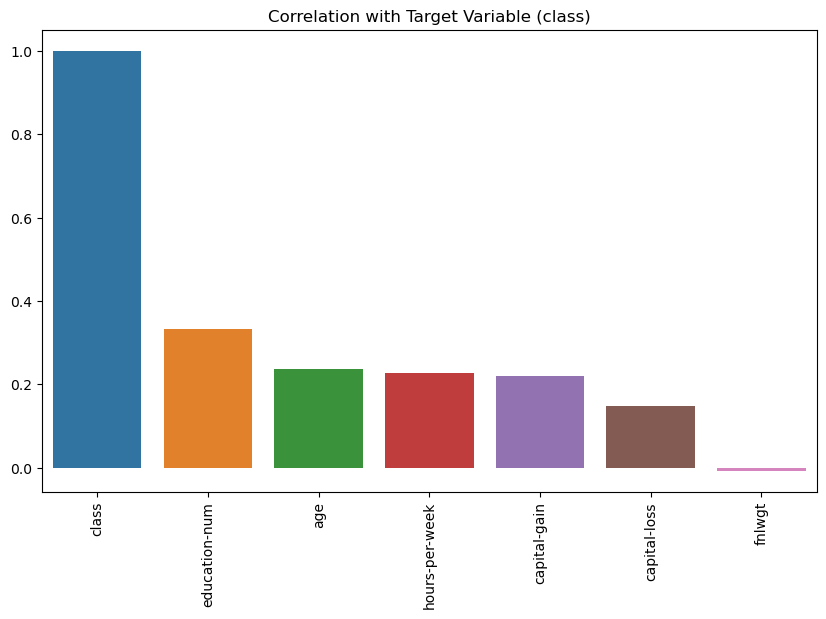

Selected Features:
 ['class', 'education-num', 'age', 'hours-per-week', 'capital-gain']


In [14]:
# Set the target variable to the correct column name
target_variable = 'class'  # The correct target variable in this dataset

# Ensure the target variable exists
if target_variable not in df.columns:
    raise KeyError(f"Target column '{target_variable}' not found in the dataset.")

# Convert the target variable to numeric if necessary
if df[target_variable].dtype not in ['int64', 'float64']:
    # Encoding the target variable (income >50K or <=50K)
    df[target_variable] = df[target_variable].apply(lambda x: 1 if x == '>50K' else 0)

# Include the target variable in the numeric DataFrame
df_numeric = df.select_dtypes(include=['number'])
df_numeric[target_variable] = df[target_variable]

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Extract correlations with the target variable
correlated_features = correlation_matrix[target_variable].sort_values(ascending=False)

# Visualize correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=correlated_features.index, y=correlated_features.values)
plt.xticks(rotation=90)
plt.title(f"Correlation with Target Variable ({target_variable})")
plt.show()

# Display selected features
selected_features = correlated_features[correlated_features.abs() > 0.2].index
print("Selected Features:\n", selected_features.tolist())


# Correlation Analysis and Feature Selection in the Adult Income Dataset

This section demonstrates how to identify and visualize features in the **Adult Income Dataset** that are most correlated with the target variable (`class`). Feature selection based on correlation can help in building simpler and more effective machine learning models.

---

## Key Steps:
1. **Set the Target Variable**:
   - The target variable is identified as `class`, representing whether an individual earns more than `$50K` (`1`) or less (`0`).

2. **Convert Target to Numeric**:
   - If the target variable is not numeric, it is converted into binary values:
     - `>50K` is mapped to `1`.
     - `<=50K` is mapped to `0`.

3. **Extract Numeric Features**:
   - Only numeric features (including the encoded target variable) are selected from the dataset for correlation analysis.

4. **Compute Correlation Matrix**:
   - The `corr()` method computes pairwise correlations between all numeric features.
   - The correlation with the target variable is extracted and sorted in descending order.

5. **Visualize Correlations**:
   - A bar plot shows the strength of correlation for each feature with the target variable, aiding in visual feature selection.

6. **Select Features**:
   - Features with an absolute correlation greater than `0.2` are selected for further analysis, as they show a reasonable relationship with the target.




---

In this notebook, we demonstrated essential data preprocessing techniques using the **Adult Income Dataset**:
1. **Handling Missing Values**: Identified and removed missing values.
2. **Feature Scaling**: Scaled numerical features using normalization and standardization.
3. **Encoding Categorical Variables**: Applied One-Hot Encoding for categorical data.
4. **Feature Engineering and Selection**: Created a new feature and selected relevant features based on correlation.

This preprocessing pipeline prepares data for building robust machine learning models. 



# **Data Preprocessing for Machine Learning**
---

This notebook demonstrates a complete preprocessing pipeline using the **Wine Quality Dataset**. The steps include:
1. Handling Missing Values
2. Feature Scaling
3. Encoding Categorical Variables
4. Feature Engineering and Feature Selection

### **Dataset: Wine Quality**
The dataset contains 11 physicochemical variables (like pH, alcohol, etc.) and a quality score (0-10) for red and white wine samples.

---


In [16]:
import pandas as pd

# Load Wine Quality Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=';')

# Preview the data
print("Dataset Preview:")
df.head()


Dataset Preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **1. Handling Missing Values**
---

### **Step 1: Identify Missing Values**
Missing values can arise during data collection. Let's handle them appropriately.


In [28]:
# Check for missing values
missing = df.isnull().sum()
missing = missing[missing > 0]  # Filter columns with missing values
print("Missing values per column:\n", missing)

# Visualize missing values using a bar plot only if there are missing values
import matplotlib.pyplot as plt

if not missing.empty:
    plt.figure(figsize=(10, 6))
    missing.plot(kind='bar', color='skyblue')
    plt.title("Missing Values Per Column", fontsize=16)
    plt.ylabel("Count of Missing Values", fontsize=14)
    plt.xlabel("Columns", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No missing values in the dataset.")

# Simulate missing values for demonstration
import numpy as np
df.loc[np.random.choice(df.index, 10), 'pH'] = np.nan

# Impute missing values using the median
df['pH'].fillna(df['pH'].median(), inplace=True)

# Confirm missing values are handled
print("Missing values after imputation:\n", df.isnull().sum())


Missing values per column:
 Series([], dtype: int64)
No missing values in the dataset.
Missing values after imputation:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
dtype: int64


## **2. Feature Scaling**
---

### **Step 1: Scale Numerical Features**
Wine quality prediction depends on physicochemical properties like acidity and alcohol content, which must be scaled.


In [23]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Create a categorical variable for wine quality (High: 7+, Medium: 5-6, Low: 0-4)
df['quality_label'] = pd.cut(df['quality'], bins=[0, 4, 6, 10], labels=['Low', 'Medium', 'High'])

# Use OneHotEncoder with updated parameter `sparse_output`
encoder = OneHotEncoder(sparse_output=False, drop='first')  # `sparse_output` replaces `sparse`
encoded_quality = encoder.fit_transform(df[['quality_label']])

# Convert the encoded features to a DataFrame
encoded_quality_df = pd.DataFrame(encoded_quality, columns=encoder.get_feature_names_out(['quality_label']))

# Concatenate the encoded features with the original DataFrame
df_encoded = pd.concat([df.reset_index(drop=True), encoded_quality_df], axis=1)

# Drop the original quality_label column
df_encoded.drop(columns=['quality_label'], inplace=True)

# Display the first few rows of the updated DataFrame
df_encoded.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label_Low,quality_label_Medium
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0,1.0


## **3. Encoding Categorical Variables**
---

### **Step 1: Encode Categorical Features**
Though this dataset lacks categorical features, we'll create a categorical variable from `quality` to demonstrate encoding.


In [25]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Create a categorical variable for wine quality (High: 7+, Medium: 5-6, Low: 0-4)
df['quality_label'] = pd.cut(df['quality'], bins=[0, 4, 6, 10], labels=['Low', 'Medium', 'High'])

# Use OneHotEncoder with `sparse_output` instead of `sparse`
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Updated parameter
encoded_quality = encoder.fit_transform(df[['quality_label']])

# Convert the encoded features to a DataFrame
encoded_quality_df = pd.DataFrame(encoded_quality, columns=encoder.get_feature_names_out(['quality_label']))
df_encoded = pd.concat([df.reset_index(drop=True), encoded_quality_df], axis=1)

# Drop the original quality_label column
df_encoded.drop(columns=['quality_label'], inplace=True)

# Display encoded data
print("Encoded Data:")
df_encoded.head()


Encoded Data:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label_Low,quality_label_Medium
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0,1.0


## **4. Feature Engineering and Feature Selection**
---

### **Step 1: Create New Features**
We'll derive meaningful features to potentially improve prediction accuracy.


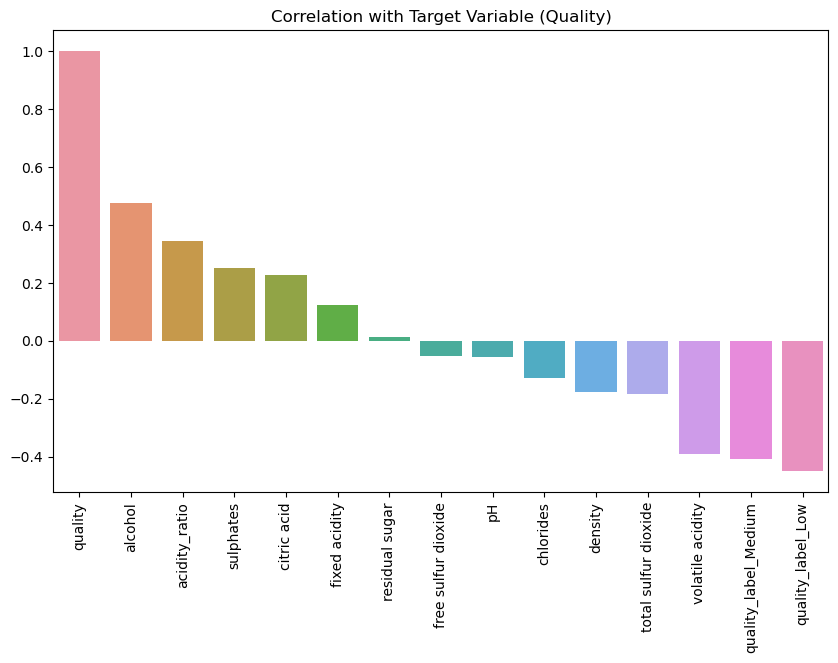

Selected Features:
 ['quality', 'alcohol', 'acidity_ratio', 'sulphates', 'citric acid', 'volatile acidity', 'quality_label_Medium', 'quality_label_Low']


In [26]:
# Feature Engineering: Create a new feature 'acidity_ratio'
df_encoded['acidity_ratio'] = df_encoded['fixed acidity'] / (df_encoded['volatile acidity'] + 1e-6)

# Feature Selection using Correlation Matrix
correlation_matrix = df_encoded.corr()
important_features = correlation_matrix['quality'].sort_values(ascending=False)

# Visualize correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=important_features.index, y=important_features.values)
plt.xticks(rotation=90)
plt.title("Correlation with Target Variable (Quality)")
plt.show()

# Select top features
selected_features = important_features[important_features.abs() > 0.2].index
print("Selected Features:\n", selected_features.tolist())
